# Airline Passenger Satisfaction Analysis

## Objective
The aim of this project is to analyze airline passenger satisfaction based on a variety of factors, such as boarding experience, seat comfort, and in-flight service. Using machine learning models, we predict passenger satisfaction to help airlines improve their service quality.

## Dataset Description
This dataset contains several features related to the airline service quality experienced by passengers. It includes both numerical and categorical data, such as age, gender, class, and satisfaction level. Our task is to predict the satisfaction level of passengers.

## Tools and Libraries Used
- Pandas for data manipulation
- Seaborn and Matplotlib for data visualization
- Scikit-learn for machine learning models


In [44]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [45]:
# Load the dataset
df = pd.read_csv('./train_dataset.csv')

# Display the first few rows of the dataset
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [46]:
# Dataset information (datatypes and missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [47]:
# Statistical summary of the dataset
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [48]:
# Dropping irrelevant or redundant columns
df.drop('id', axis=1, inplace=True)

/Users/sheraliozodov/anaconda3/envs/New_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sheraliozodov/anaconda3/envs/New_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sheraliozodov/anaconda3/envs/New_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


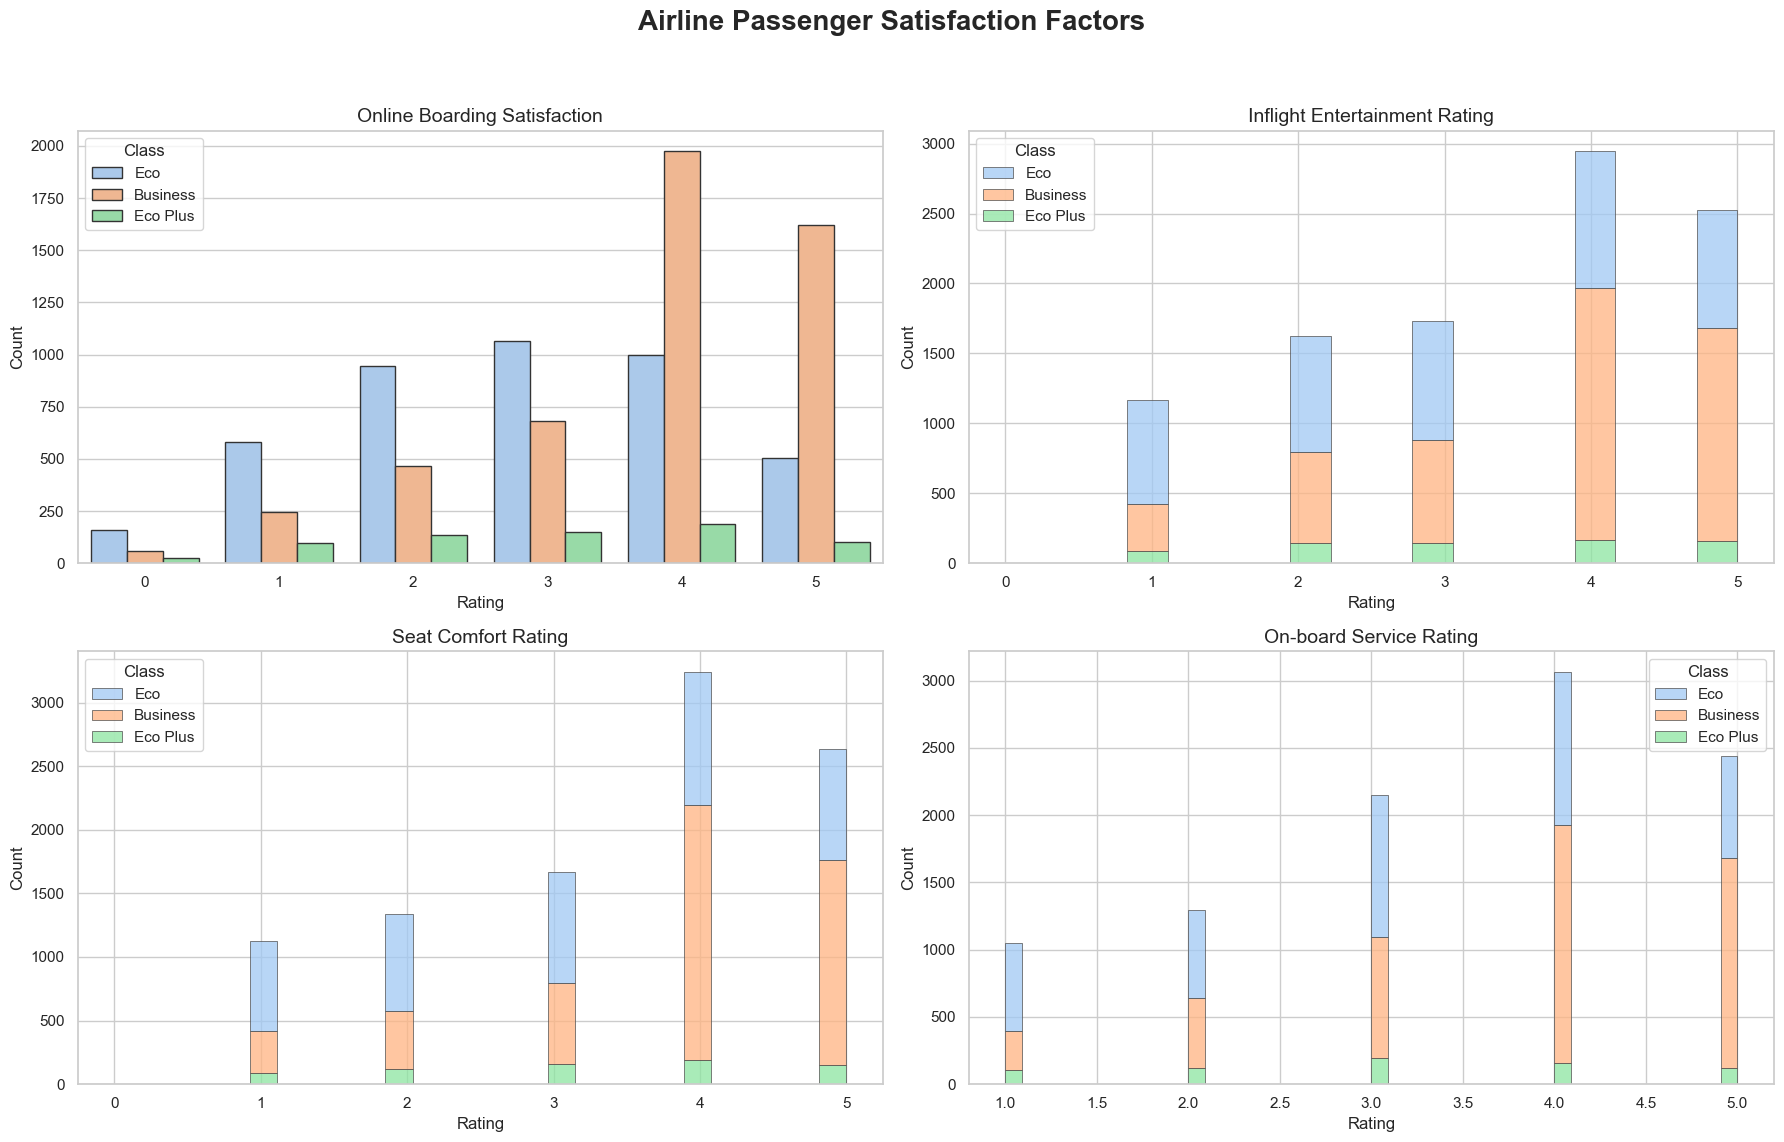

In [49]:
# Setting up the aesthetics for the plots
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")

# Creating subplots for visualizing different aspects of the dataset
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Airline Passenger Satisfaction Factors', fontsize=20, fontweight='bold')

# Online Boarding
sns.countplot(x="Online boarding", data=df, ax=axes[0, 0], hue='Class', edgecolor=".2")
axes[0, 0].set_title('Online Boarding Satisfaction', fontsize=14)
axes[0, 0].set_xlabel('Rating', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].legend(title='Class')

# Inflight Entertainment
sns.histplot(x="Inflight entertainment", data=df, ax=axes[0, 1], hue='Class', multiple="stack", edgecolor=".3", linewidth=.5)
axes[0, 1].set_title('Inflight Entertainment Rating', fontsize=14)
axes[0, 1].set_xlabel('Rating', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# Seat Comfort
sns.histplot(x="Seat comfort", data=df, ax=axes[1, 0], hue='Class', multiple="stack", edgecolor=".3", linewidth=.5)
axes[1, 0].set_title('Seat Comfort Rating', fontsize=14)
axes[1, 0].set_xlabel('Rating', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# On-board Service
sns.histplot(x="On-board service", data=df, ax=axes[1, 1], hue='Class', multiple="stack", edgecolor=".3", linewidth=.5)
axes[1, 1].set_title('On-board Service Rating', fontsize=14)
axes[1, 1].set_xlabel('Rating', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

# Adjusting layout for better spacing and saving the plot if needed
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


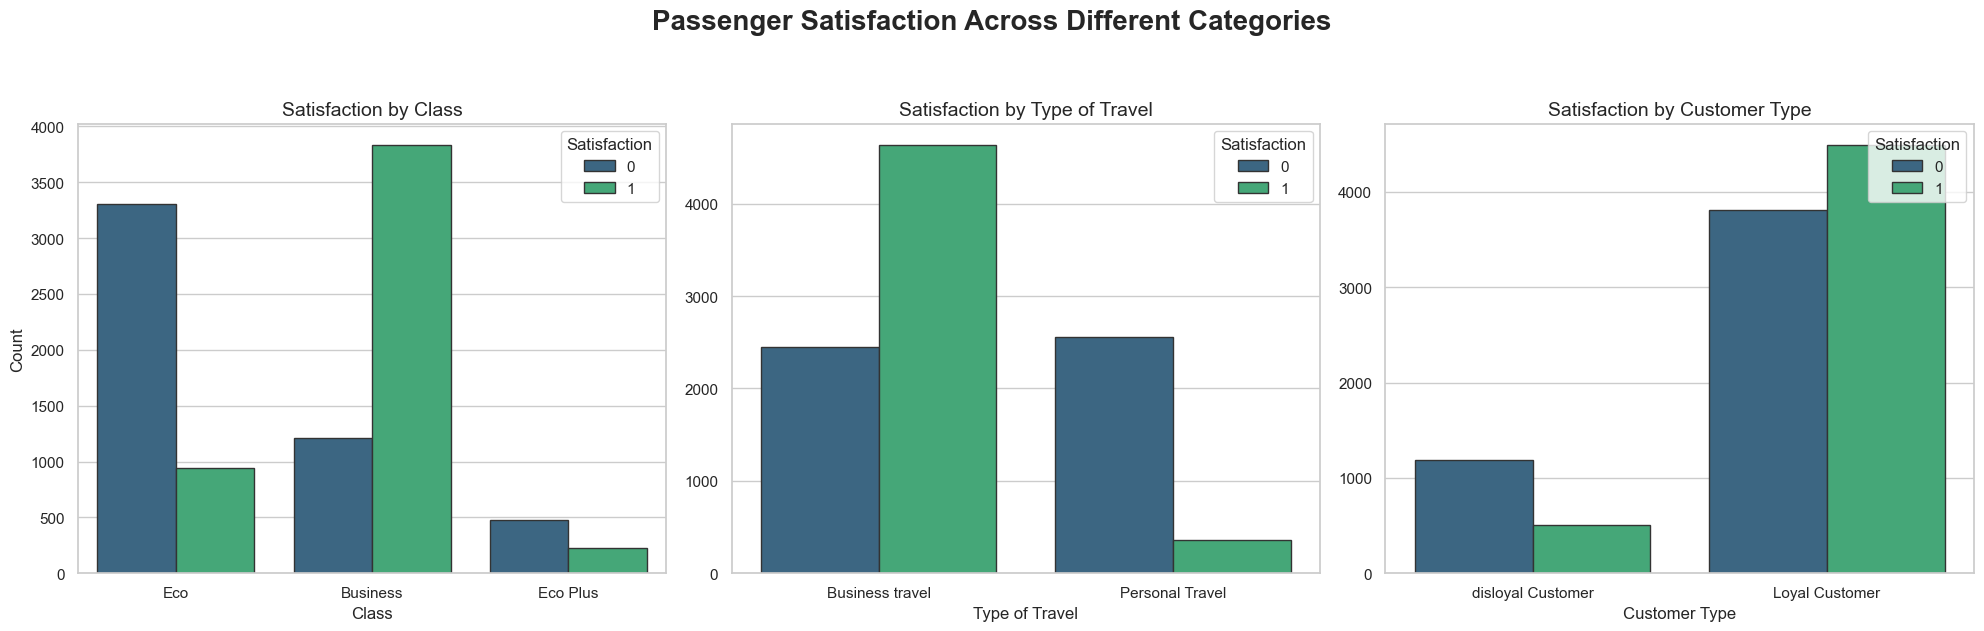

In [50]:
df['satisfaction'] = df['satisfaction'].astype(str) 
# Setting up the aesthetics for the plots
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Creating subplots for visualizing passenger satisfaction by different categories
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Passenger Satisfaction Across Different Categories', fontsize=20, fontweight='bold', y=1.05)

# Satisfaction by Class
sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df, ax=axes[0], edgecolor=".2")
axes[0].set_title('Satisfaction by Class', fontsize=14)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Satisfaction', loc='upper right')

# Satisfaction by Type of Travel
sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df, ax=axes[1], edgecolor=".2")
axes[1].set_title('Satisfaction by Type of Travel', fontsize=14)
axes[1].set_xlabel('Type of Travel', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend(title='Satisfaction', loc='upper right')

# Satisfaction by Customer Type
sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df, ax=axes[2], edgecolor=".2")
axes[2].set_title('Satisfaction by Customer Type', fontsize=14)
axes[2].set_xlabel('Customer Type', fontsize=12)
axes[2].set_ylabel('')
axes[2].legend(title='Satisfaction', loc='upper right')

# Adjusting layout for better spacing
plt.tight_layout()

# Displaying the plots
plt.show()

/Users/sheraliozodov/anaconda3/envs/New_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sheraliozodov/anaconda3/envs/New_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

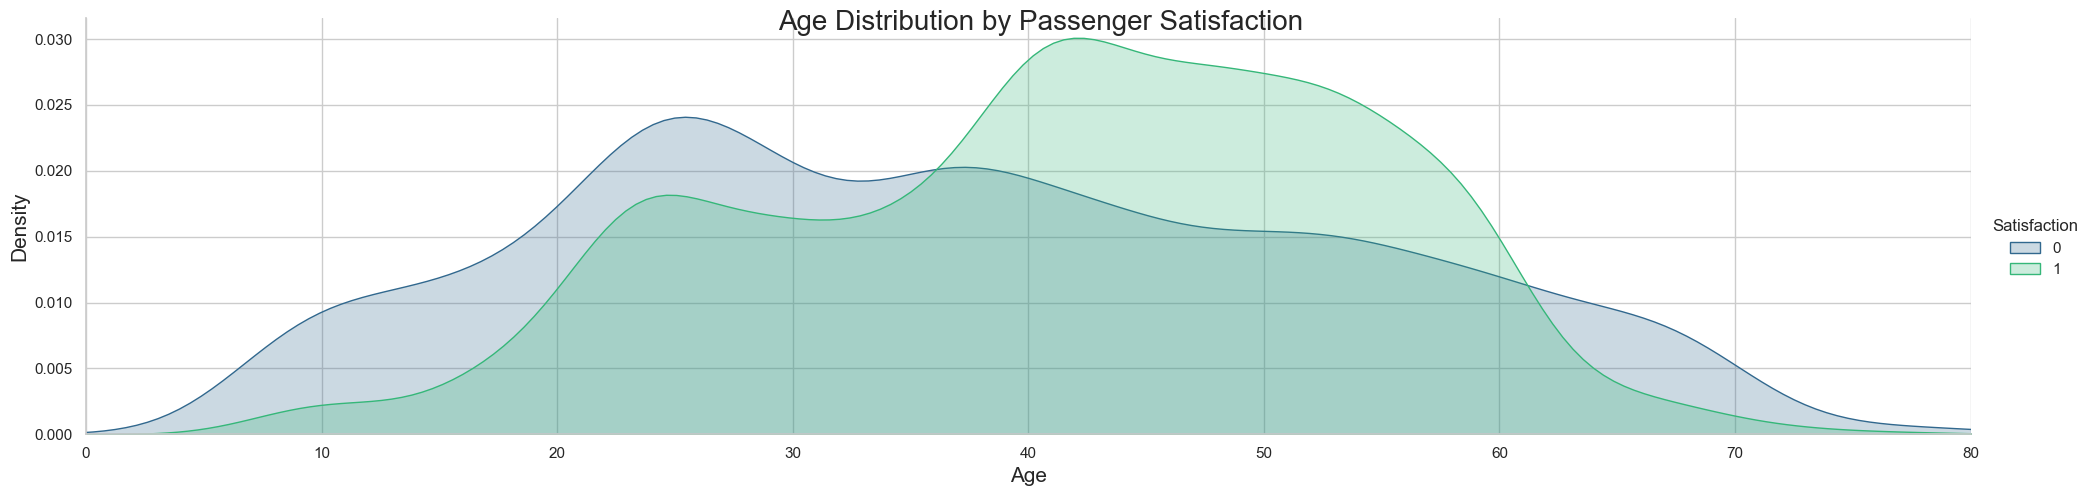

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creating a FacetGrid to show the distribution of age by satisfaction, improving readability
facet = sns.FacetGrid(df, hue='satisfaction', aspect=4, height=5, palette="viridis")
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend(title='Satisfaction')

# Adding titles and labels for better understanding
facet.fig.suptitle('Age Distribution by Passenger Satisfaction', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Density', fontsize=15)

# Showing the plot
plt.show()


In [52]:
# Converting categorical columns to numeric
male_convertion = {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].map(male_convertion)

customer_conv = {'Loyal Customer':1, 'disloyal Customer':0}
df['Customer Type'] = df['Customer Type'].map(customer_conv)

travel_conv = {'Business travel':1, 'Personal Travel':0}
df['Type of Travel'] = df['Type of Travel'].map(travel_conv)

class_conv = {'Business':2, 'Eco Plus':1, 'Eco':0}
df['Class'] = df['Class'].map(class_conv)

In [54]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for tr_idx, te_idx in strat_split.split(df, df['satisfaction']):
    strat_train_set = df.iloc[tr_idx]
    strat_test_set = df.iloc[te_idx]

# Separating features (X) and target label ('satisfaction') for both training and testing sets
X_train = strat_train_set.drop('satisfaction', axis=1)
y_train = strat_train_set['satisfaction'].copy()

X_test = strat_test_set.drop('satisfaction', axis=1)
y_test = strat_test_set['satisfaction'].copy()


In [55]:
# Preprocessing pipeline: Imputing missing values with medians and standardizing numerical features
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
            ('median_imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler())
])

# Applying the preprocessing pipeline to both training and testing datasets
X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.transform(X_test)


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.88      0.86      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Model's accuracy: 0.871


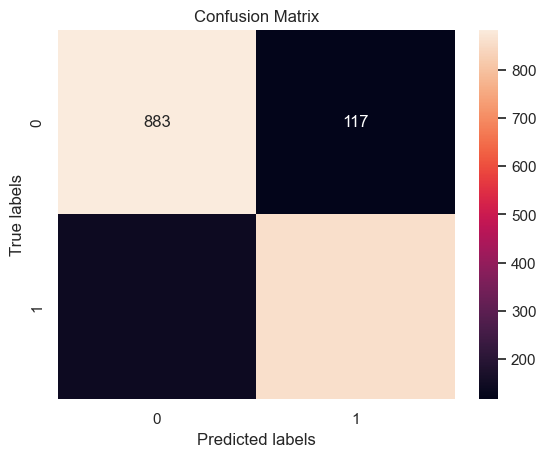

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Training a Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_prep, y_train)

# Evaluating the model on the test set
y_pred = log_reg_model.predict(X_test_prep)
print(metrics.classification_report(y_test, y_pred))
print(f"Model's accuracy: {metrics.accuracy_score(y_test, y_pred):0.3f}")

# Visualizing the confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1000
           1       0.95      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model's accuracy: 0.939


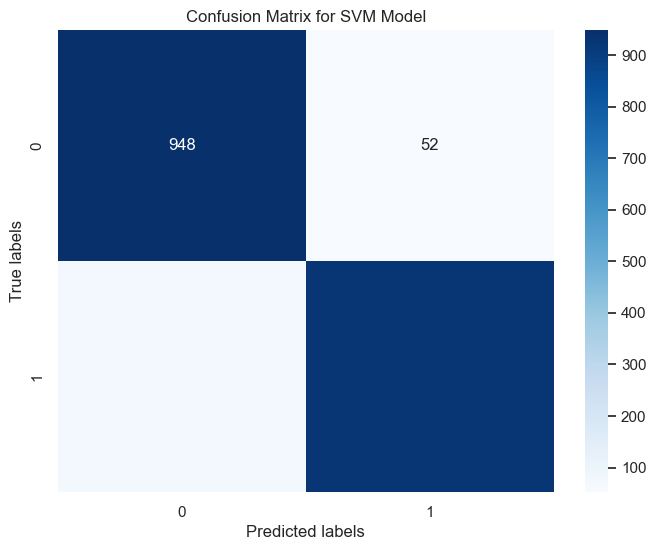

In [60]:
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train_prep, y_train)

y_pred = svm_model.predict(X_test_prep)

print(metrics.classification_report(y_test, y_pred))
print(f"Model's accuracy: {metrics.accuracy_score(y_test, y_pred):0.3f}")

# Visualize the confusion matrix to understand true vs predicted labels
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues') 
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1000
           1       0.92      0.92      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Model's accuracy: 0.923


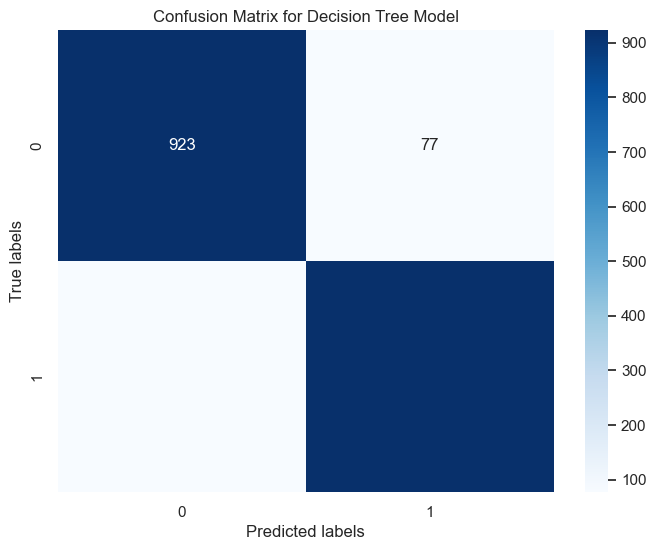

In [62]:
# Train the Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_prep, y_train)

# Predict and evaluate the model
y_pred = tree_model.predict(X_test_prep)
print(metrics.classification_report(y_test, y_pred))
print(f"Model's accuracy: {metrics.accuracy_score(y_test, y_pred):0.3f}")

# Visualize the confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

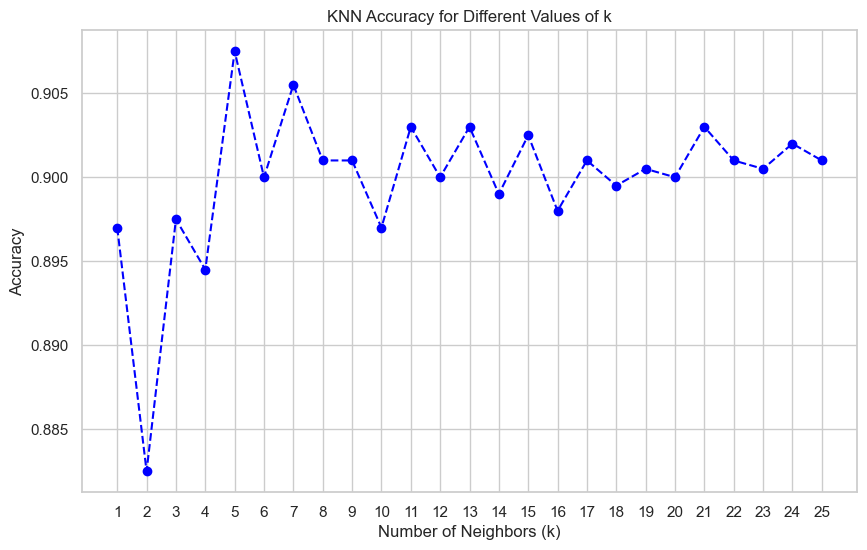

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare a list to store accuracy scores for different values of k
k_values = range(1, 26)
accuracy_scores = []

for k in k_values:
    # Initialize and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_prep, y_train)
    
    y_pred = knn.predict(X_test_prep)
    
    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting accuracy scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [64]:
# k=5 was found to be the best based on the plot
best_k = 5

# Initialize the KNN model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model
knn_best.fit(X_train_prep, y_train)

# Predictions and evaluation
y_pred_best = knn_best.predict(X_test_prep)
print(metrics.classification_report(y_test, y_pred_best))
print(f"Optimal KNN Model's accuracy (k={best_k}): {accuracy_score(y_test, y_pred_best):0.3f}")


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1000
           1       0.94      0.87      0.90      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Optimal KNN Model's accuracy (k=5): 0.907


##
After evaluating several machine learning models, including Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM), the SVM model has been identified as yielding the highest accuracy in predicting passenger satisfaction based on the given dataset. 

This outcome underscores the SVM model's robustness and its ability to handle the complexity and nuances of the dataset effectively, making it the preferred choice for this particular classification task.
##


In [66]:
# Load the test dataset
test_df = pd.read_csv('./test_dataset.csv')

# Dropping the 'id' column as it's not used for prediction
test_df.drop(['id'], axis=1, inplace=True)

# Checking for missing values in the test dataset
missing_values = test_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Filling NaN values in 'Arrival Delay in Minutes' with the median of the column
test_df['Arrival Delay in Minutes'].fillna(test_df['Arrival Delay in Minutes'].median(), inplace=True)

Missing values in each column:
 Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64


In [67]:
# Converting categorical columns to numerical values
male_conversion = {'Male': 1, 'Female': 0}
customer_conversion = {'Loyal Customer': 1, 'disloyal Customer': 0}
travel_conversion = {'Business travel': 1, 'Personal Travel': 0}
class_conversion = {'Business': 2, 'Eco Plus': 1, 'Eco': 0}

test_df['Gender'] = test_df['Gender'].map(male_conversion)
test_df['Customer Type'] = test_df['Customer Type'].map(customer_conversion)
test_df['Type of Travel'] = test_df['Type of Travel'].map(travel_conversion)
test_df['Class'] = test_df['Class'].map(class_conversion)

# Preprocessing the test dataset using the pipeline
test_df_prepared = full_pipeline.transform(test_df)

In [92]:
# Making predictions with the trained model
test_predictions = svm_model.predict(test_df_prepared)

# Loading the sample submission file
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['satisfaction'] = test_predictions

In [105]:
print(sample_submission)

        id satisfaction
0        1            0
1        2            1
2        3            1
3        4            1
4        5            0
...    ...          ...
3995  3996            1
3996  3997            0
3997  3998            0
3998  3999            1
3999  4000            0

[4000 rows x 2 columns]
